# LakePy Walkthrough
---
### James (Jake) Gearon, Department of Geological Sciences, Jackson School of Geosciences
##### [Github](https://github.com/jameshgrn) | [Medium](https://medium.com/@jake.gearon_34983) | [Twitter](https://twitter.com/JakeGearon) | [LinkedIn](https://www.linkedin.com/in/jake-gearon-742767148/) | [Website](https://jameshgrn.github.io) 

First, import lakepy and SciPy's "detrend" function:

In [1]:
import lakepy as lk
from scipy.signal import detrend

The real magic of LakePy is in its data structures and time-series generation abilities. Let's peek into the data structure of LakePy. In the example below, we begin searching the Global Lake Level Database by setting the search function equal to a variable, in this case, "mead"

If you have used Pandas before, this is similar to the creation of a dataframe
```
df = pd.DataFrame()
```
where df is the dataframe _object_. Similarly, **mead** is the Lake _object_.

In [2]:
mead = lk.search(name="mead")

   id_No    source                            lake_name
0    114  hydroweb                                 Mead
1   1519      usgs  MEAD LAKE WEST BAY NEAR WILLARD, WI


/Users/jakegearon/PycharmProjects/LakePy/lakepy/main.py:45: RuntimeWarning: Search Result: 'mead' has more than 1 Result. Showing the 2 most relevant results.
Specify 'id_No' or narrow search name.
  'Specify \'id_No\' or narrow search name.'.format(name, len(df)), category = RuntimeWarning)


The output of the search indicates multiple lakes match "mead"

Let's choose the correct Lake Mead, in southern Nevada, USA.

In [3]:
mead = lk.search(id_No = 114)

,id_No,lake_name,source,basin,status,country,end_date,latitude,longitude,identifier,start_date
0,114,Mead,hydroweb,Colorado,research,USA,2014-12-29 00:21,36.13,-114.45,L_mead,2000-06-14 10:22


Reading lake level records from database...


As there is only one available lake, the **mead** variable is populated with pertinent information. 

Technically, the Lake object has certain attributes (values) and methods (functions). You can see the full list of methods and attributes in the [LakePy Documentation](http://lakepydocs.com.s3-website.us-east-2.amazonaws.com/API/#lakepy.main.Lake.__init__). Some useful attributes for our purposes are:
- Lake.metadata
- Lake.observation_period
- Lake.latitude & Lake.longitude
- Lake.country

In [4]:
mead.metadata # same as search output

,id_No,lake_name,source,basin,status,country,end_date,latitude,longitude,identifier,start_date
0,114,Mead,hydroweb,Colorado,research,USA,2014-12-29 00:21,36.13,-114.45,L_mead,2000-06-14 10:22


In [5]:
mead.observation_period ## Range of Data

'2000-06-14 10:22 -- 2014-12-29 00:21'

In [6]:
print(mead.latitude, mead.longitude) #Native Lat Long

36.13 -114.45


In [7]:
mead.country #country of residence

'USA'

A useful function for preliminary verification/exploration is [```Lake.plot_mapview()```](http://lakepydocs.com.s3-website.us-east-2.amazonaws.com/API/#lakepy.main.Lake.plot_mapview) which uses [GeoPandas](https://github.com/geopandas/geopandas) and [Contextily](https://github.com/geopandas/contextily) to plot simple overview maps.

/Users/jakegearon/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:353: RasterioDeprecationWarning: Source dataset should be opened in read-only mode. Use of datasets opened in modes other than 'r' will be disallowed in a future version.
  img.transpose(2, 0, 1), transform, "EPSG:3857", t_crs, resampling


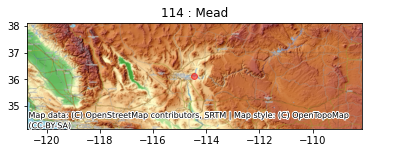

In [8]:
mead.plot_mapview()

Disregard the warning, it's coming from a dependency. While this overview is cursory, you can pass zoom levels and basemap arguments as according to [Contextily](https://github.com/geopandas/contextily)

/Users/jakegearon/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:353: RasterioDeprecationWarning: Source dataset should be opened in read-only mode. Use of datasets opened in modes other than 'r' will be disallowed in a future version.
  img.transpose(2, 0, 1), transform, "EPSG:3857", t_crs, resampling


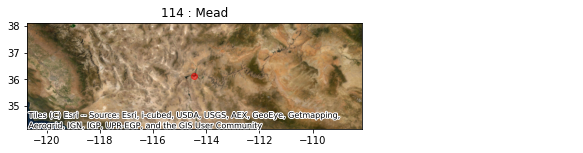

In [9]:
import contextily as ctx
mead.plot_mapview(provider = ctx.providers.Esri.WorldImagery)

Now let's look at plotting lake water level time-series, somethng LakePy can handle easily using the function [```Lake.plot_timeseries()```](http://lakepydocs.com.s3-website.us-east-2.amazonaws.com/API/#lakepy.main.Lake.plot_timeseries). The default plotting function uses Plotly, which is the most accessible for new users

In [10]:
mead.plot_timeseries()

Using the `how` parameter, one can pass 'matplotlib' or 'seaborn' to use two popular python plotting packages. This gives the user more autonomy, allowing different colors and even returning the axis object when the `show` parameter is set to `False`

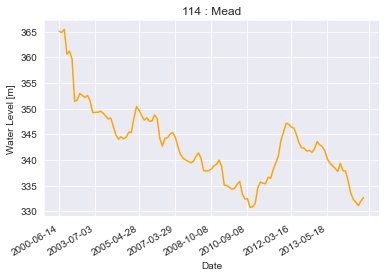

In [12]:
%matplotlib inline
mead.plot_timeseries(how='matplotlib', color='orange')

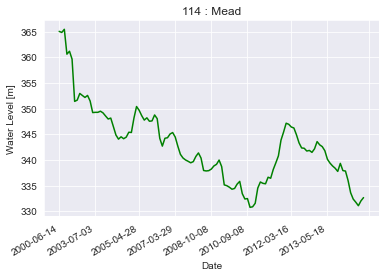

In [16]:
mead.plot_timeseries(how='seaborn', color='green')

That should get you started! For issues, see the [issues tracker](https://github.com/ESIPFed/LakePy/issues) on our GitHub Repository. Want to contribute to LakePy? Visit our [contributing guidelines!](http://lakepydocs.com.s3-website.us-east-2.amazonaws.com/contributing/)